<a href="https://colab.research.google.com/github/Jonas1997Pereira/Introdu-o-Ci-ncia-de-Dados/blob/main/08_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

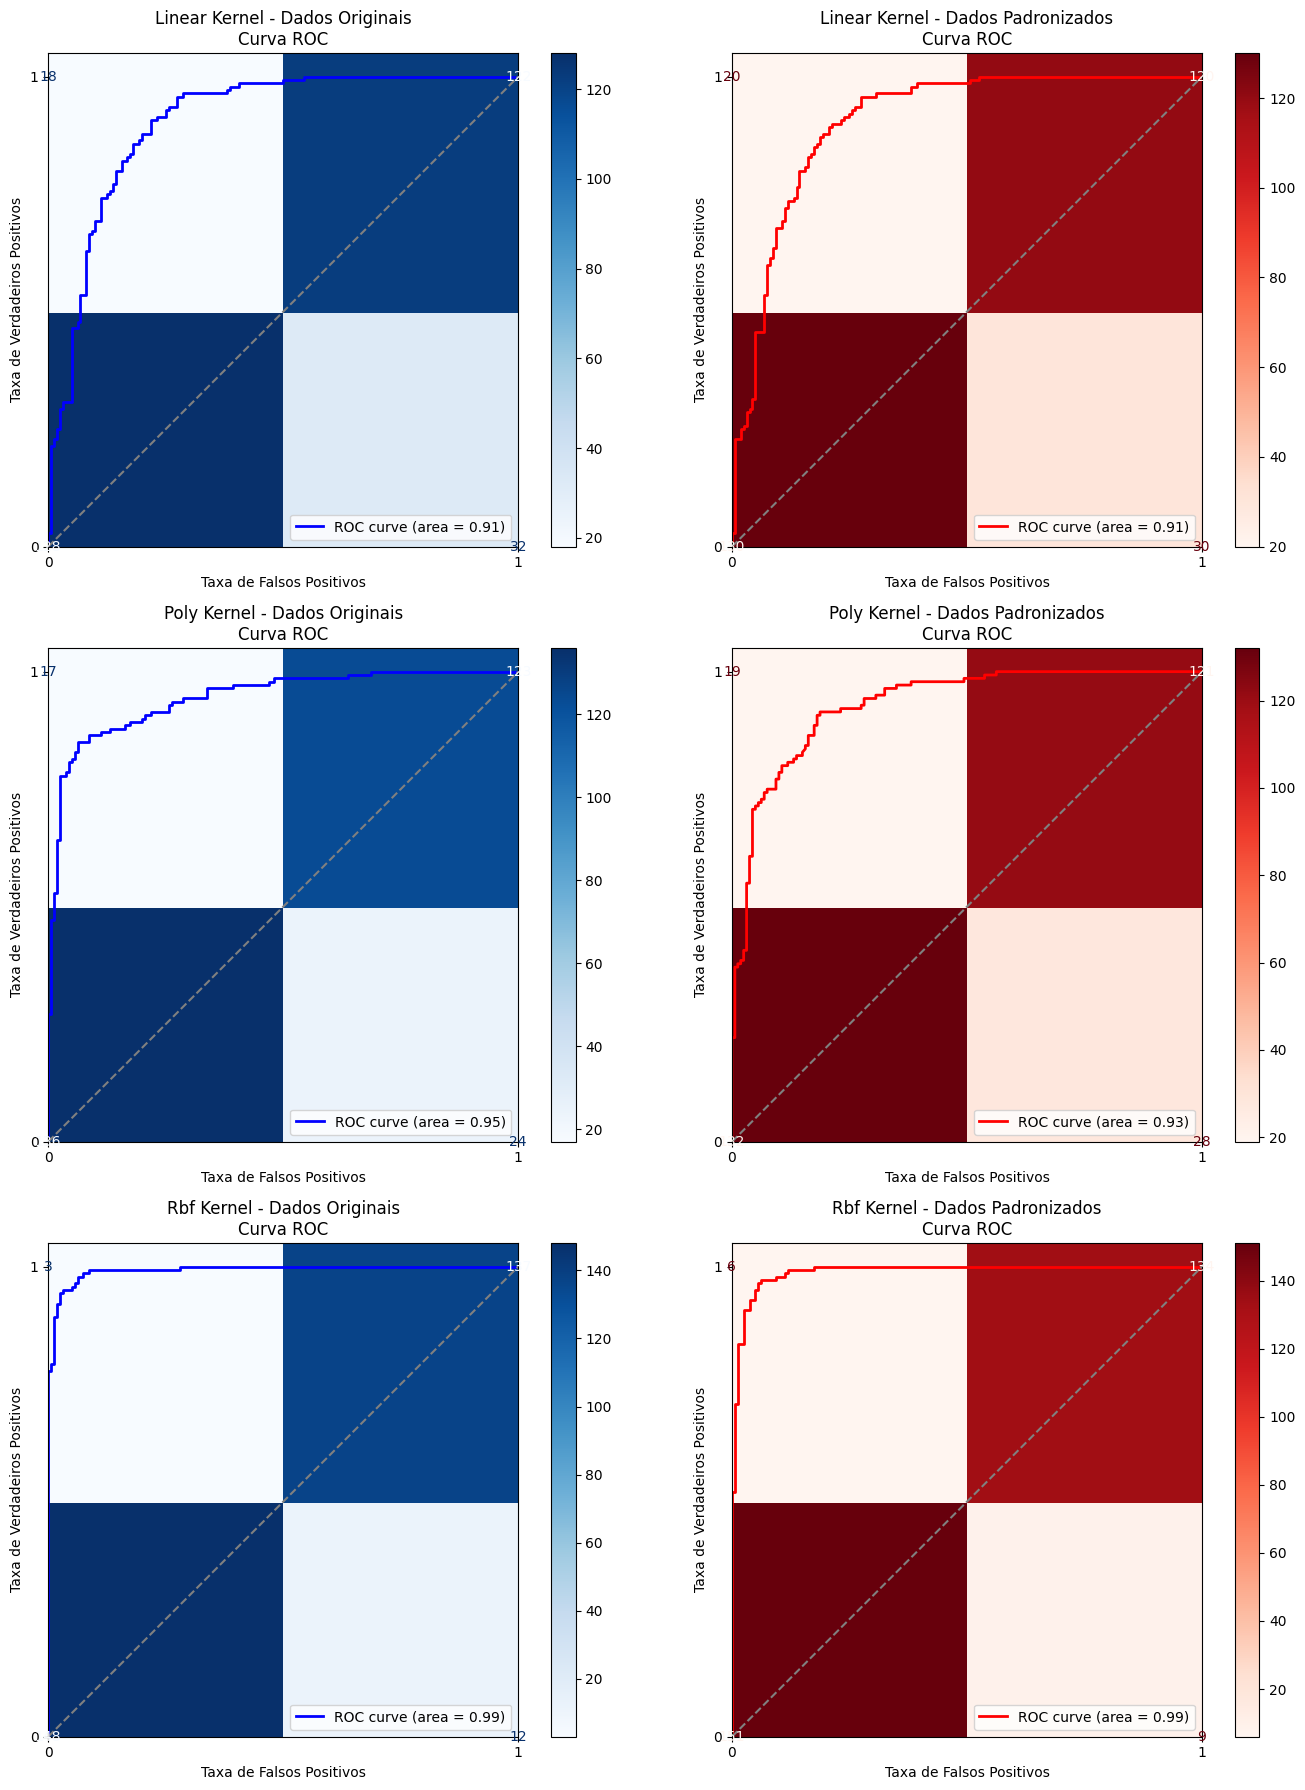

In [4]:
# Importação de bibliotecas necessárias

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Criação de Conjunto de Dados Sintético

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42)

# Divisão do Conjunto de Dados em Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Salvando os Dados Originais (Antes da Padronização)

df_original_train = pd.DataFrame(X_train)
df_original_train['target'] = y_train
df_original_test = pd.DataFrame(X_test)
df_original_test['target'] = y_test

# Padronização dos Dados

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Salvando os dados padronizados

df_scaled_train = pd.DataFrame(X_train_scaled)
df_scaled_train['target'] = y_train
df_scaled_test = pd.DataFrame(X_test_scaled)
df_scaled_test['target'] = y_test

# Treinamento do Modelo SVM com Diferentes Kernels

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Dados originais
    svc_original = SVC(kernel=kernel, probability=True, random_state=42)
    svc_original.fit(X_train, y_train)
    y_pred_original = svc_original.predict(X_test)
    cm_original = confusion_matrix(y_test, y_pred_original)
    fpr_original, tpr_original, _ = roc_curve(y_test, svc_original.predict_proba(X_test)[:, 1])
    roc_auc_original = auc(fpr_original, tpr_original)

    # Dados padronizados
    svc_scaled = SVC(kernel=kernel, probability=True, random_state=42)
    svc_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = svc_scaled.predict(X_test_scaled)
    cm_scaled = confusion_matrix(y_test, y_pred_scaled)
    fpr_scaled, tpr_scaled, _ = roc_curve(y_test, svc_scaled.predict_proba(X_test_scaled)[:, 1])
    roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

    results[kernel] = {
        'cm_original': cm_original,
        'roc_original': (fpr_original, tpr_original, roc_auc_original),
        'cm_scaled': cm_scaled,
        'roc_scaled': (fpr_scaled, tpr_scaled, roc_auc_scaled)
    }

# Avaliação dos Resultados e Visualização

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

for i, kernel in enumerate(kernels):
    # Matriz de Confusão - Dados Originais
    disp = ConfusionMatrixDisplay(confusion_matrix=results[kernel]['cm_original'])
    disp.plot(ax=axes[i, 0], cmap='Blues')
    axes[i, 0].set_title(f'{kernel.capitalize()} Kernel - Dados Originais\nMatriz de Confusão')

    # Curva ROC - Dados Originais
    fpr, tpr, roc_auc = results[kernel]['roc_original']
    axes[i, 0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[i, 0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[i, 0].set_xlim([0.0, 1.0])
    axes[i, 0].set_ylim([0.0, 1.05])
    axes[i, 0].set_xlabel('Taxa de Falsos Positivos')
    axes[i, 0].set_ylabel('Taxa de Verdadeiros Positivos')
    axes[i, 0].set_title(f'{kernel.capitalize()} Kernel - Dados Originais\nCurva ROC')
    axes[i, 0].legend(loc="lower right")

    # Matriz de Confusão - Dados Padronizados
    disp = ConfusionMatrixDisplay(confusion_matrix=results[kernel]['cm_scaled'])
    disp.plot(ax=axes[i, 1], cmap='Reds')
    axes[i, 1].set_title(f'{kernel.capitalize()} Kernel - Dados Padronizados\nMatriz de Confusão')

    # Curva ROC - Dados Padronizados
    fpr, tpr, roc_auc = results[kernel]['roc_scaled']
    axes[i, 1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[i, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[i, 1].set_xlim([0.0, 1.0])
    axes[i, 1].set_ylim([0.0, 1.05])
    axes[i, 1].set_xlabel('Taxa de Falsos Positivos')
    axes[i, 1].set_ylabel('Taxa de Verdadeiros Positivos')
    axes[i, 1].set_title(f'{kernel.capitalize()} Kernel - Dados Padronizados\nCurva ROC')
    axes[i, 1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Salvamento dos Dataframes Originais e Padronizados

df_original_train.to_csv("original_train.csv", index=False)
df_original_test.to_csv("original_test.csv", index=False)
df_scaled_train.to_csv("scaled_train.csv", index=False)
df_scaled_test.to_csv("scaled_test.csv", index=False)

# Conclusão

# Em geral, a padronização tende a melhorar o desempenho em kernels não lineares.



A padronização dos dados mostrou-se crucial para melhorar o desempenho dos modelos SVM, especialmente com kernels não lineares, ao garantir uma contribuição equilibrada de todas as características. Isso resultou em uma separação mais eficaz das classes, refletida em métricas como a matriz de confusão e a curva ROC. No geral, a padronização é uma etapa essencial no pré-processamento de dados para modelos de machine learning.
